# Plotting and Visualisation in Python
- In almost all fields, visualisation of data is an universal tool to communicatie the results to wide-array of users.
- Graphical representation of data provides more knowledge and insights in intrepreting the compuational results.
- In the scientific computing environment of Python, there are a number of high-quality visualisation libraries.
- The most population general-purpose visulisation library is `matplotlib`, which maninly focuses on generating static publication-quality 2D and 3D graphs.
- Many other libraries focus on specific areas of visualisation.
    - `bokeh` and `plotly` -- primarily focus on interactivity and web connectivity.
    - `seaborn` -- a high-level plotting libarry which focuses on statistical data analysis (this library is based on `matplotlib`).
    - Few others are `mayavi`, `vispy` for 3D visualisation and `paraview`, a scritable with Python.

### Matplotlib Library
- Matplotlib is a Python library for publicaiton-quality 2D and 3D graphis, with support for a variety of different output formats.
- The latest version (at the time of preparing this notes) is 3.8.0
- Matplotlib is available at the project's website www.matplotlib.org
- One can visit this site for detailed documentation and extensive gallery showcasing the various types of graphs that can be generated using the matplotlib library.
- This gallery is a great source of insipiration for visualisation idea, and I highly recommend you to exploring this gallery.

### Importing the Libraries
- Matplotlib actually provides multiple entry points into the library, with the different application programming interfaces (APIs)
    - a stateful API
    - an object-oriented API
- Both these APIs are provided by the module `matplotlib.pyplot`
- To use the object-orienented Matplotlib API, we first need to import its Python modules
- The Matplotlib is imported using the following standard conventions:
```python
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
```
- The first line assumes that we are working in an IPython environment (Jupyter Notebook) and the `inline` specifies that figures need to be placed inline in the notebook.
    - The other options include 'qt5agg' for viewing the figures in a separate window supported with Qt5 backend.

## Preamble for the codes presented in this notebook

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

### Figure Object 

- A graph in matplotlib is structured in terms of a `Figure` instance and one or more `Axes` instances within the figure.
- The various components of a Matplotlib Figure are shown in the following:
<img src="anatomy.webp" style="zoom:25%;" />
- The main components of a Figure object are:
    - Figure (The whole Figure, which contains Axes)
    - Axes (The region of Figure that contains the plotting data, which includes two/three Axis objects) 
    - Axis (The object that sets the limits and scales the plotting data)
    - Artist (Basically everything that is present in the Figure)
- The plotting functions expect `NumPy Array` objects as inputs.  Every other object has to be converted to a NumPy array.

### Creating Figure Object
```python
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```

## Coding styles
### The explicit and the implicit interfaces

There are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

### The explicit "Axes" interface (OO-style)

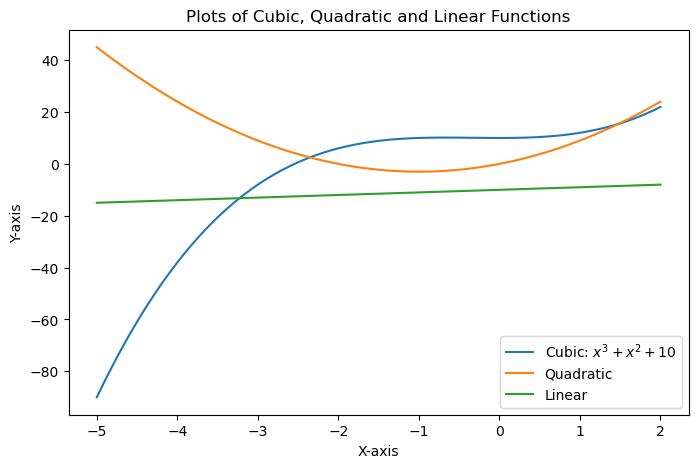

In [2]:
x = np.linspace(-5,2,100)
y1 = x**3 + x**2 + 10
y2 = 3*x**2 + 6*x
y3 = x - 10

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,y1,label='Cubic: $x^3 + x^2 + 10$')
ax.plot(x,y2,label='Quadratic')
ax.plot(x,y3,label='Linear')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plots of Cubic, Quadratic and Linear Functions')
ax.legend()
plt.show()

### The implicit "PyPlot" interface (PP-style)

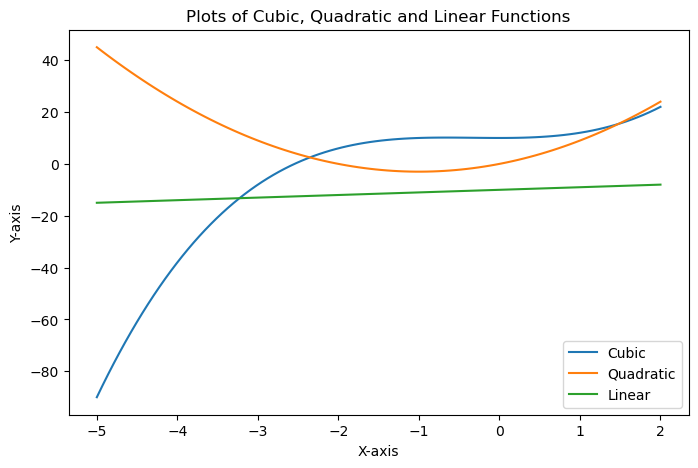

In [3]:
x = np.linspace(-5,2,100)
y1 = x**3 + x**2 + 10
y2 = 3*x**2 + 6*x
y3 = x - 10

fig = plt.figure(figsize=(8,5))
plt.plot(x,y1,label='Cubic')
plt.plot(x,y2,label='Quadratic')
plt.plot(x,y3,label='Linear')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plots of Cubic, Quadratic and Linear Functions')
plt.legend()
plt.show()

## Comparision of above two approaches

### Plotting using implicit style - Approach #1

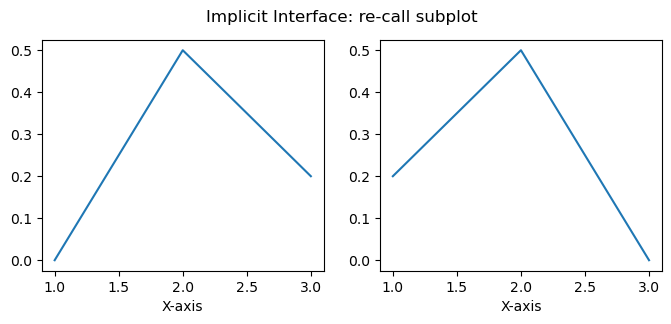

In [4]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('X-axis')

### Plotting using implicit style - Approach #2 (Saving the handles)

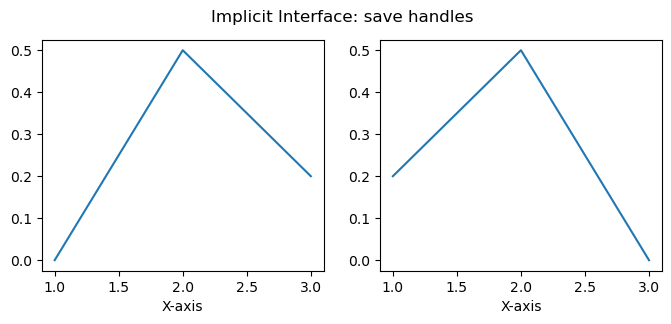

In [5]:
plt.figure(figsize=(8,3))
axs = []
ax = plt.subplot(1, 2, 1)
axs += [ax]
plt.plot([1, 2, 3], [0, 0.5, 0.2])

ax = plt.subplot(1, 2, 2)
axs += [ax]
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: save handles')

#plt.xlabel('X-axis')
for i in range(2):
    plt.sca(axs[i])
    plt.xlabel('X-axis')

### Recommend way - Explicit approach

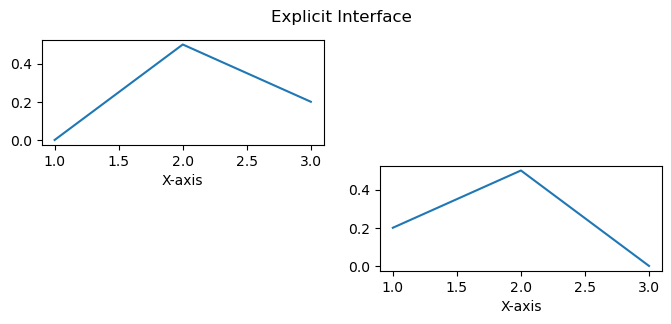

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(8,3))
axs[0,0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1,1].plot([3, 2, 1], [0, 0.5, 0.2])
axs[0,1].remove() # Remove the axis object at (0,1)
axs[1,0].remove() # Remove the axis object at (1,0)

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel('X-axis')
    
fig.suptitle('Explicit Interface')
plt.show()

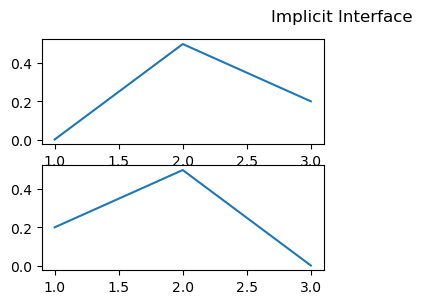

In [7]:
fig = plt.figure(figsize=(8,3))
plt.subplot(221)
plt.plot([1, 2, 3], [0, 0.5, 0.2])
plt.subplot(223)
plt.plot([3, 2, 1], [0, 0.5, 0.2])
fig.suptitle('Implicit Interface')
plt.show()

### Line Plot

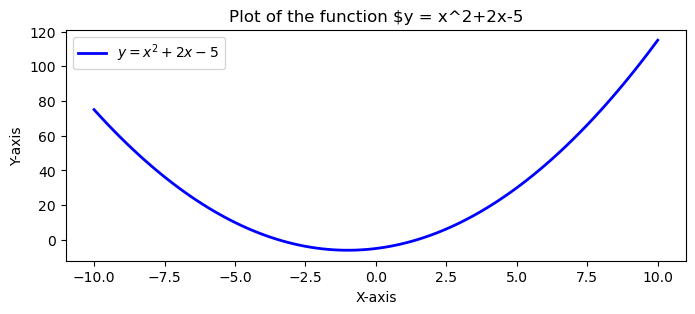

In [8]:
x = np.linspace(-10,10,100)
y = x**2 + 2*x - 5

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x,y,'-b',lw=2,label='$y=x^2+2x-5$')
ax.legend()
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of the function $y = x^2+2x-5')
plt.show()

### Scatter Plot

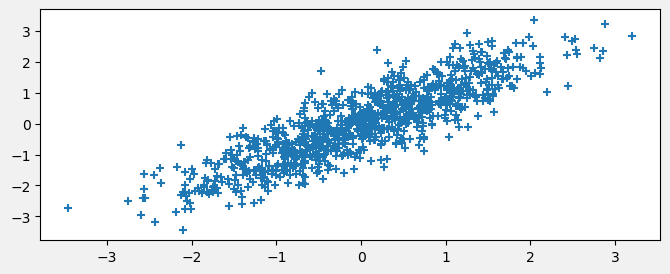

In [9]:
x = np.random.randn(1,1000)
y = np.random.randn(1,1000)

fig,ax = plt.subplots(figsize=(8,3),facecolor='#f1f1f1')
ax.scatter(x,x+0.6*y,marker='+')
plt.show()

### Barcharts

In [10]:
help(ax.bar)

Help on method bar in module matplotlib.axes._axes:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bottom side(s) of the bars.
    
    align : {'center', 'edge'}, default: 'center

In [11]:
help(ax.barh)

Help on method barh in module matplotlib.axes._axes:

barh(y, width, height=0.8, left=None, *, align='center', data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Make a horizontal bar plot.
    
    The bars are positioned at *y* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The horizontal baseline
    is *left* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    y : float or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    width : float or array-like
        The width(s) of the bars.
    
    height : float or array-like, default: 0.8
        The heights of the bars.
    
    left : float or array-like, default: 0
        The x coordinates of the left side(s) of the bars.
    
    align : {'center', 'edge'}, default: 'cen

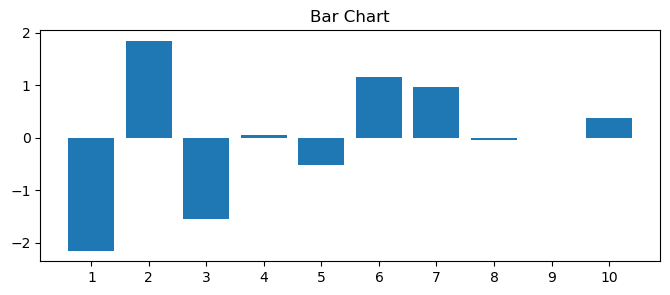

In [12]:
x = np.random.randn(10).flatten()
fig,ax = plt.subplots(figsize=(8,3))
xaxisdata= np.arange(x.size)
ax.bar(xaxisdata,x)
ax.set_xticks(xaxisdata,xaxisdata+1)
ax.set_title('Bar Chart')
plt.show()

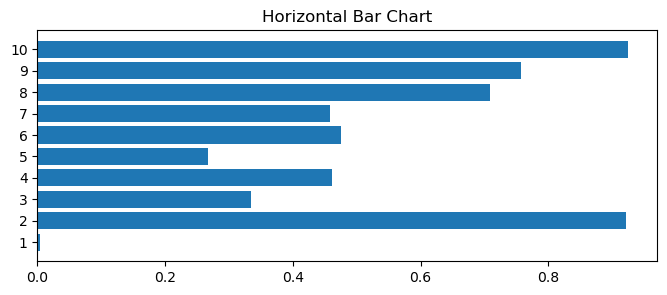

In [13]:
x = np.random.rand(10)
fig,ax = plt.subplots(figsize=(8,3))
xaxisdata= np.arange(x.size)
ax.barh(xaxisdata,x)
ax.set_yticks(xaxisdata,xaxisdata+1)
ax.set_title('Horizontal Bar Chart')
plt.show()

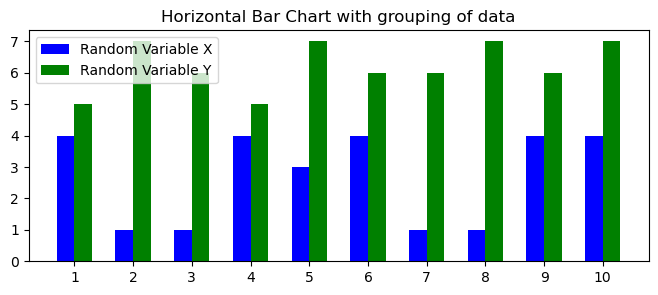

In [14]:
x = np.random.randint(1,5,size=(10))
y = np.random.randint(5,8,size=(10))
fig,ax = plt.subplots(figsize=(8,3))
xaxisdata = np.arange(len(x))
ax.bar(xaxisdata-0.15,x,width=0.3,color='b',label='Random Variable X')
ax.bar(xaxisdata+0.15,y,width=0.3,color='g',label='Random Variable Y')
ax.set_xticks(xaxisdata,xaxisdata+1)
ax.set_title('Horizontal Bar Chart with grouping of data')
ax.legend()
plt.show()

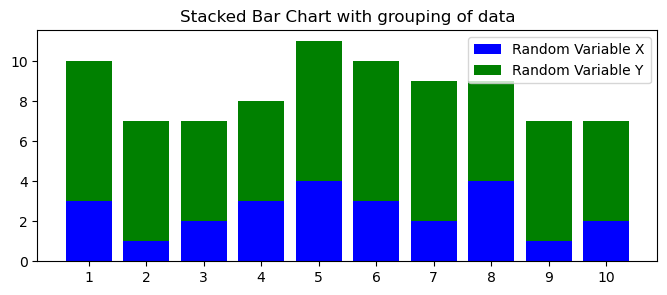

In [15]:
x = np.random.randint(1,5,size=(10))
y = np.random.randint(5,8,size=(10))
fig,ax = plt.subplots(figsize=(8,3))
xaxisdata = np.arange(len(x))
ax.bar(xaxisdata,x,color='b',label='Random Variable X')
ax.bar(xaxisdata,y,bottom=x,color='g',label='Random Variable Y')
ax.set_xticks(xaxisdata,xaxisdata+1)
ax.set_title('Stacked Bar Chart with grouping of data')
ax.legend()
plt.show()

### Pie chart 

In [16]:
help(ax.pie)

Help on method pie in module matplotlib.axes._axes:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None) method of matplotlib.axes._axes.Axes instance
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
  

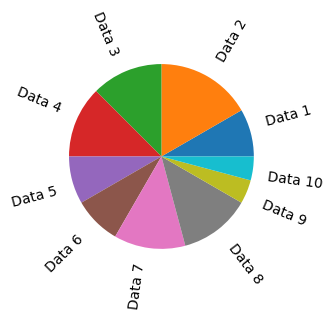

In [17]:
x = np.random.randint(1,5,size=(10))
labels = ["Data "+str(i+1) for i in range(x.size)]
fig,ax = plt.subplots(figsize=(8,3))
ax.pie(x,labels=labels,labeldistance=1.15,rotatelabels=True)
plt.show()

### Plot Styles

<img src="PlotStyles.png" style="zoom:63%;" />

- `Axes.step` for step plot
- `Axes.hist` for histogram
- `Axes.errorbar` for plotting error bars
- `Axes.fill_between` for filling the regions between two curves
- `Axes.quiver` for plotting quiver (directional fields)

One can refer the `matplotlib` documentation for examples. We will workout these examples in the upcoming 

### Line and Maker Properties
<img src="LineProperties.png" style="zoom:100%;" />

### Examples

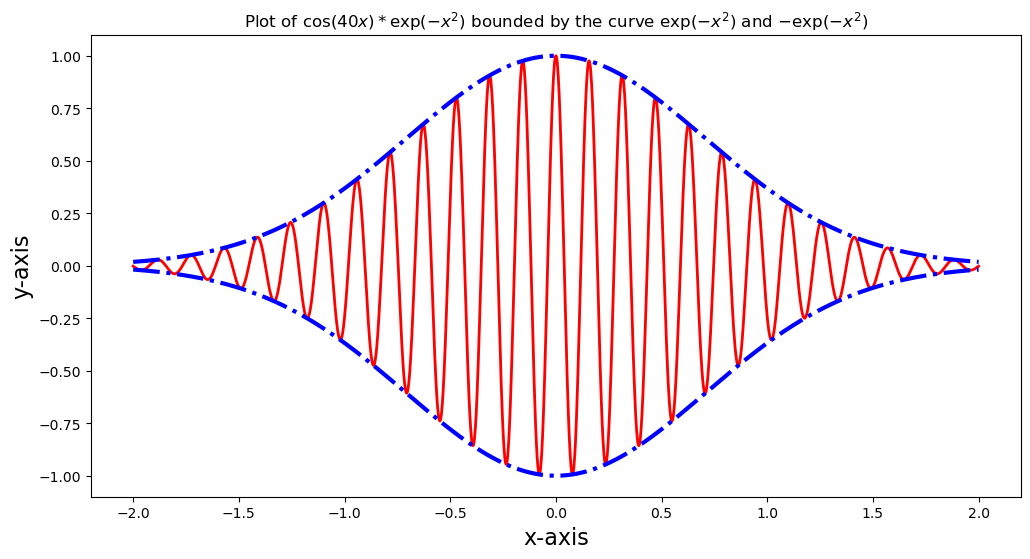

In [18]:
x = np.linspace(-2,2,2000)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(x,y1*y2,ls='-',color='red',lw=2)
ax.plot(x,y2,ls='-.',color='blue',lw=3)
ax.plot(x,-y2,ls='-.',color='blue',lw=3)
ax.set_xlabel('x-axis',fontsize=16)
ax.set_ylabel('y-axis',fontsize=16)
ax.set_title('Plot of $\cos(40x)*\exp(-x^2)$ bounded by the curve $\exp(-x^2)$ and $-\exp(-x^2)$')
plt.show()

### Legends
- A graph with multiple lines may often benefit from a legend, which dispalys a label along each line type (at some place) within the figure.
- A legend may be added to an `Axes` instance in a Matplotlib figure using the `legend` method.
- Only lines with assigned labels are cincluded in the legend and to assign a label to a line, use the `label` argument of `Axes.plot`.
- The legend method accepts a large number of optional arugments --- see `help(plt.legend)` for more details.
- Here, we emphasise on few useful arguments.
    - `loc` -- allows us to specify where in the `Axes` area the legend is to be added.
        - `loc = 1` for upper-right corner
        - `loc = 2` for upper-left corner
        - `loc = 3` for lower-left corner
        - `loc = 4` for lower-right corner
        - If `loc` is omitted then the Matplotlib automatically evaluates the placement such that legend is minimally interacts with the figure data.
    - `bbox_to_anchor` help us to place the legend at an arbitrary location within the figure.
        - The `bbox_to_anchor` argument takes the value of a tuple on the form $(x,y)$, where $x$ and $y$ are the *canvas coordinates* within the `Axes` object.
            - Point $(0,0)$ corresponds to lower-left corner
            - Point $(0,1)$ corresponds to lower-right corner
            - Point $(1,0)$ corresponds to upper-left corner
            - Point $(1,1)$ corresponds to upper-right corner
        - Using the `ncol` argument, we can split the legend labels into multiple columns

### Basic Line Plot Example with Data Points

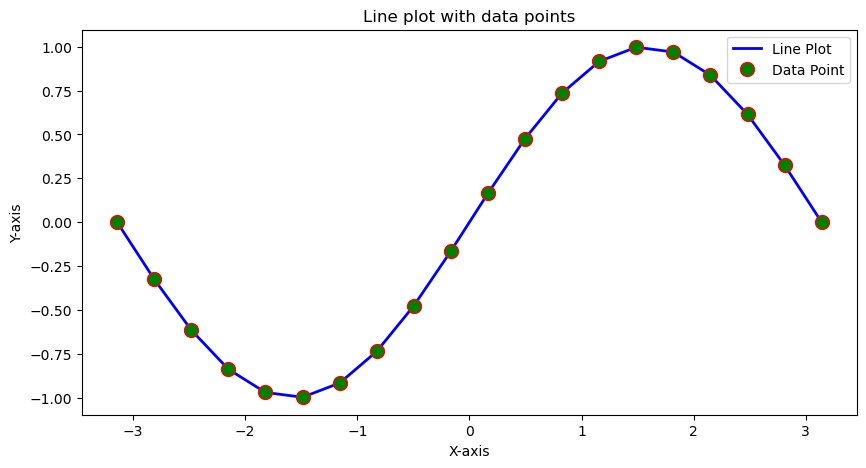

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
x = np.linspace(-np.pi, np.pi, 20)
y = np.sin(x)

plt.plot(x,y,color='blue',lw=2)
plt.plot(x,y,'o',markeredgecolor='r',markerfacecolor='green',ms=10)
plt.title('Line plot with data points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Line Plot','Data Point'])
plt.show()

### Example illustrating the `fill_between` and the use of `bbox_to_anchor` in `plt.legend` to place the legend ourside of the figure

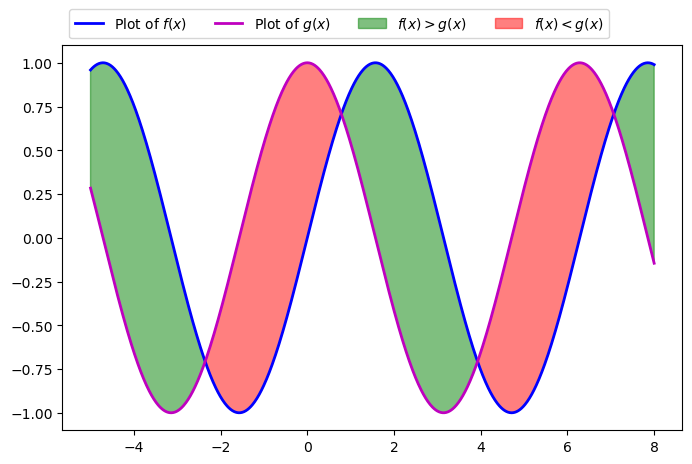

In [20]:
x = np.linspace(-5,8,1000)
f = np.sin(2*np.pi+x)
g = np.cos(2*np.pi-x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f,c='b',lw=2,label='Plot of $f(x)$')
ax.plot(x,g,c='m',lw=2,label='Plot of $g(x)$')
ax.fill_between(x,f,g,where=(f > g),color='green',alpha=0.5,label='$f(x) > g(x)$')
ax.fill_between(x,f,g,where=(f < g),color='red',alpha=0.5,label='$f(x) < g(x)$')
ax.legend(ncol=4, loc=3, bbox_to_anchor=(0,1))

plt.show()

### Axes Ticks, Tick Labels, Spines and Grids

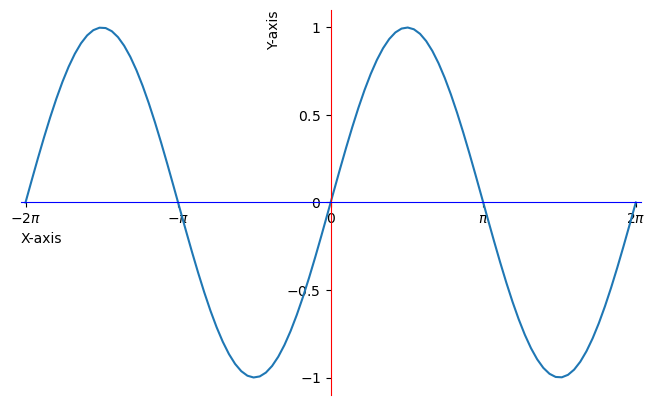

In [21]:
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(x,y)

# set x-axis and y-axis limits
ax.set_xlim([-2*np.pi-0.1, 2*np.pi+0.1])
ax.set_ylim([-1.1, 1.1])

# set x-axis and y-axis labels
ax.set_xlabel('X-axis',loc='left') #loc = 'left', 'center', 'right' -- default is 'center' 
ax.set_ylabel('Y-axis',loc='top') #loc = 'top', 'center', 'bottom' -- default is 'center'

# set x-axis and y-axis ticks
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

# set x-axis and y-axis tick labels
ax.set_xticklabels(['$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$'])
ax.set_yticklabels(['$-1$', '$-0.5$', '$0$', '$0.5$', '$1$'])

# remove top and right spines (axis)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('red')
ax.spines['bottom'].set_color('blue')

# remove top and right spines (axis) ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine (axis) to $x = 0$ and $y=0$
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

### Subplots
- The matplotlib command `plt.subplots` returns a tuple with a `Figure` instance and a NumPy array with the `Axes` objects for each row and colum that was requested in the functiona call.
- If the either $x-$axis or $y-$axis or both of the suplots shares the same value, then one can use `sharex=Ture` and `sharey=True` arguments of `plt.subplots` to aovid the same axis labels to be repeated across multiple axes.
- One should remember that the dimension of the NumPy array with `Axes` instances that is returned by `plt.subplots` is "squeezed" by default: that is, the dimensions with length $1$ are removed from the array.
    - If both requested number of column and row are greater than one, then a two-dimensional array is returned, but if either (or both) the number of columns or rows is one, then a one-dimensional (or scalar, i.e., the only `Axes` object itself) is returned.
    - We can turn off the squeezing of the dimensions of the NumPy array by passing the arugment `squeeze=False` to the `plt.subplots` function. In this case the `ax` variable in `fig, ax = plt.subplots(nrows,ncols)` is always a two-dimenstional array.
- Another important function, which is of useful many times while using subplots is `plt.subplot_adjust` function.
    - This function allows to explicity set the left, right, bottom and top coordinates of the overall `Axes` grid, as well as the width (`wspace`) and height spacing (`hspace`) between `Axes` instances in the grid.

### Basic Example of Subplots without any axes plots

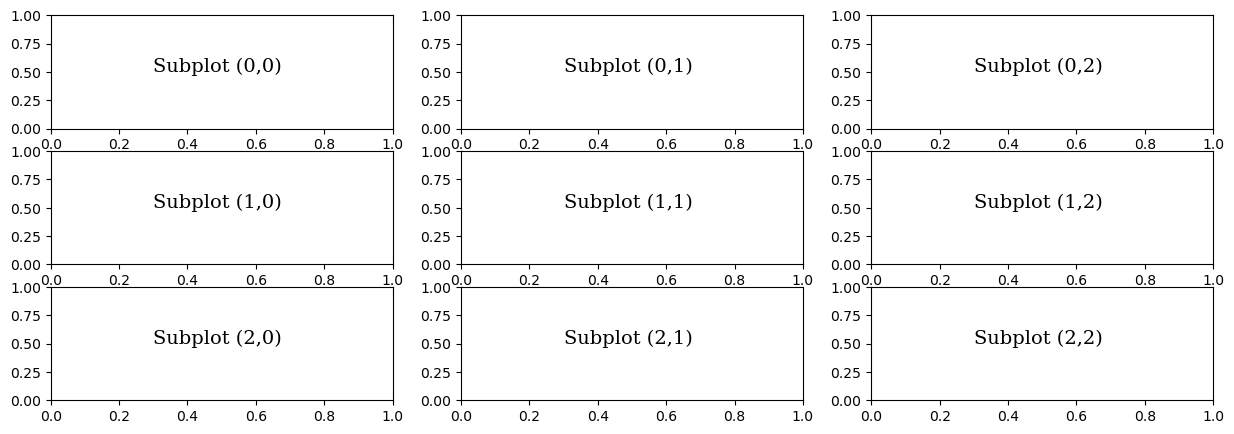

In [22]:
fig, ax = plt.subplots(3,3,figsize=(15,5))
for i in range(len(ax)):
    for j in range(len(ax[0])):
        ax[i,j].text(0.3,0.5,'Subplot ('+str(i)+','+str(j)+')', fontsize=14, family='serif')

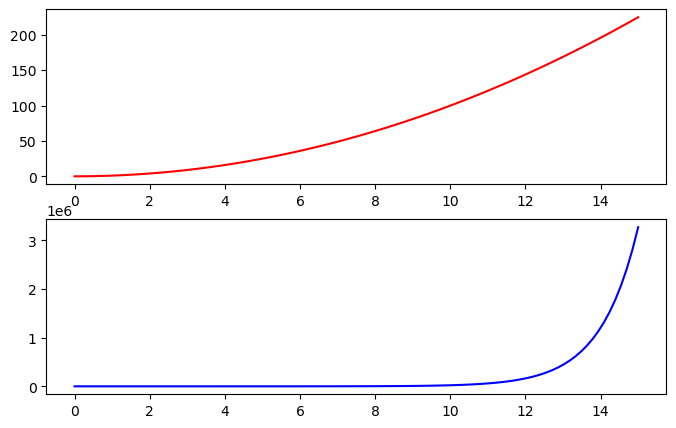

In [23]:
x = np.linspace(0,15,100)
y1 = x**2
y2 = np.exp(x)

fig, ax = plt.subplots(2,1,figsize=(8,5))
ax[0].plot(x,y1,'r')
ax[1].plot(x,y2,'b')
plt.show()

## Some advanced examples

### Example with subplot_adjust

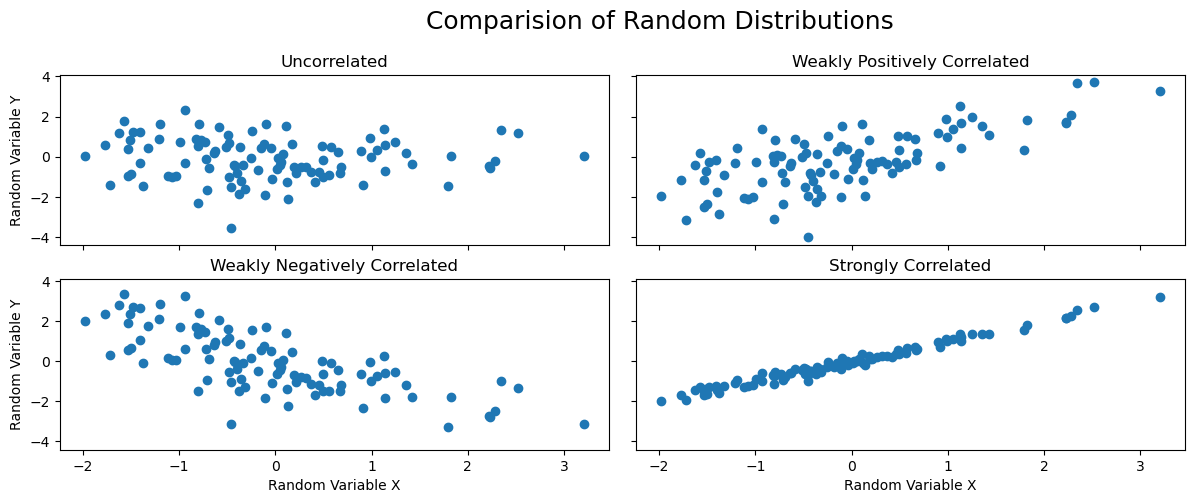

In [24]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex = True, sharey=True)
ax[0,0].scatter(x1,x2)
ax[0,0].set_title('Uncorrelated')
ax[0,0].set_ylabel('Random Variable Y')

ax[0,1].scatter(x1,x1+x2)
ax[0,1].set_title('Weakly Positively Correlated')

ax[1,0].scatter(x1,-x1+x2)
ax[1,0].set_title('Weakly Negatively Correlated')
ax[1,0].set_xlabel('Random Variable X')
ax[1,0].set_ylabel('Random Variable Y')

ax[1,1].scatter(x1,x1+ 0.15*x2)
ax[1,1].set_title('Strongly Correlated')
ax[1,1].set_xlabel('Random Variable X')

plt.suptitle('Comparision of Random Distributions',fontsize=18)

plt.subplots_adjust(left=0.1,right=0.85,bottom=0.1, top=0.85, wspace=0.05, hspace=0.2)
plt.show()

### Deleting a subplot using `Axes.remove()` and then merging the subplots with GridSpec

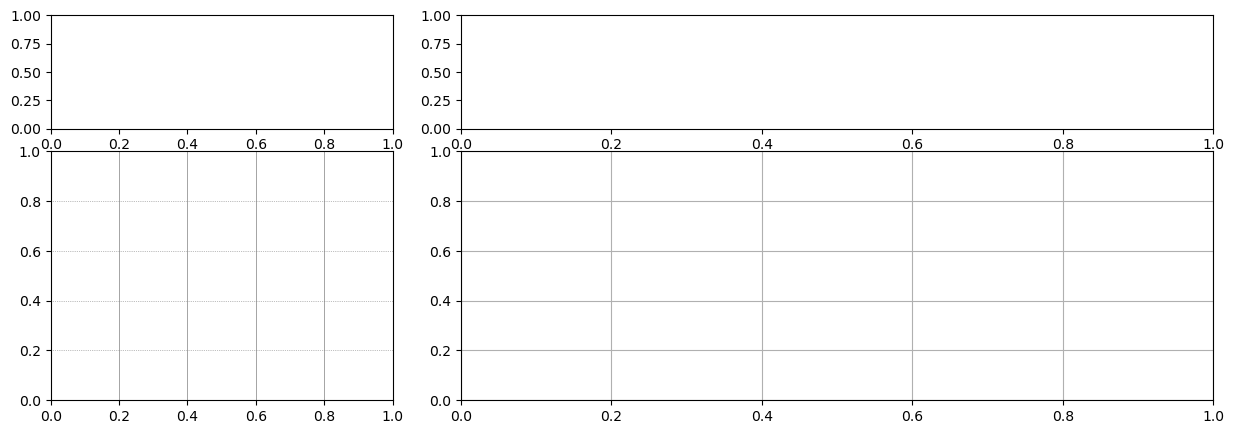

In [25]:
fig, axs = plt.subplots(3,3,figsize=(15,5))

# Let us remove subplts at (0,1) and (0,2) and add a subplot spanned to these two places
# We first need to obtain the Grid Specifiactions using ax.get_gridspec()
gs = axs[0,0].get_gridspec()
axs[0,1].remove()
axs[0,2].remove()
axs_012 = fig.add_subplot(gs[0, 1:])

# Let us combine the subplots at (1,0) and (2,0)
axs[1,0].remove()
axs[2,0].remove()
axs_120 = fig.add_subplot(gs[1:,0])
axs_120.grid(color='grey',which='major',axis='x',linestyle='-',linewidth=0.5)
axs_120.grid(color='grey',which='major',axis='y',linestyle=':',linewidth=0.5)

# Let us combine the subplots at (1,1),(1,2),(2,1) and (2,2)
for ax in axs[1:,1]:
    ax.remove()
for ax in axs[1:,2]:
    ax.remove()    
ax_1122 = fig.add_subplot(gs[1:,1:])
ax_1122.grid()

# 3D-Plotting

### Plotting 3D functions on 2D space: `contour, confourf, pcolor, imshow`

To illustrate this let us consider plotting of the function $$z = f(x,y) = \cos(x)\cos(y)e^{-\left(\frac{x}{5}\right)^2-\left(\frac{y}{5}\right)^2}$$ over the $xy-$grid $[-10,10]\times[-10,10]$

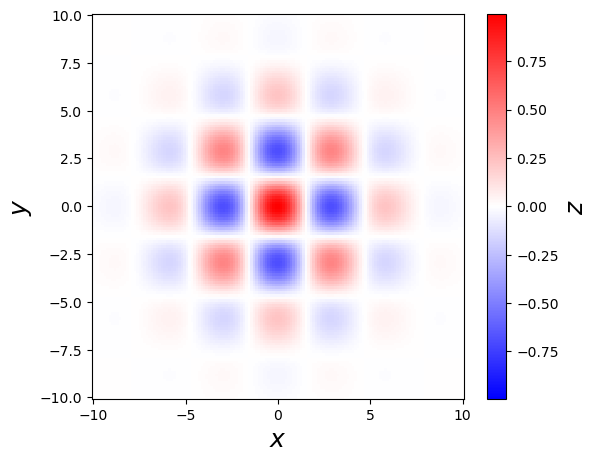

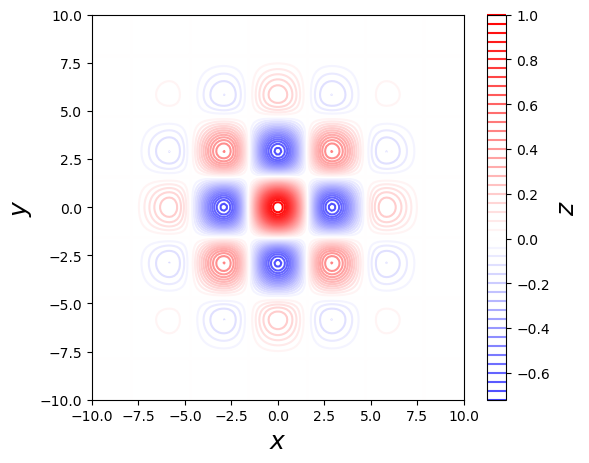

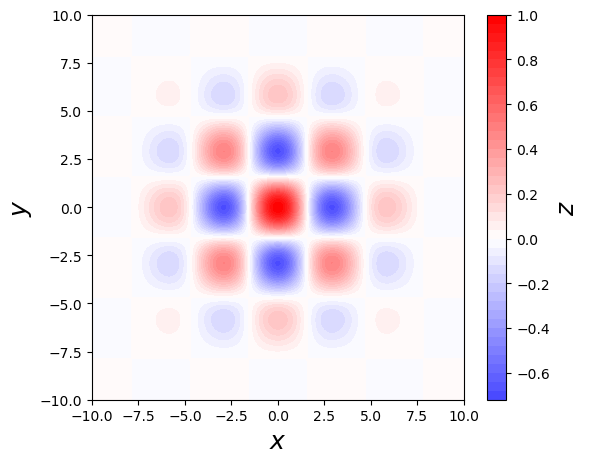

In [26]:
# first generated the x,y values over which the function to be evaluated.
x = y = np.linspace(-10,10,150)

# now generate the $XY-$ grid using numpy.meshgrid
X,Y = np.meshgrid(x,y)

# now evaluate the function values on the above grid
Z = np.cos(X)*np.cos(Y)*np.exp(-(X/5)**2-(Y/5)**2)

# Patch Color Plot

fig,ax = plt.subplots(figsize=(6,5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max()) #for normang the colors in the plotting
p = ax.pcolor(X,Y,Z, norm=norm, cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)

cb = fig.colorbar(p,ax=ax)
cb.set_label('$z$', fontsize=18)

# Contour Plot

fig,ax = plt.subplots(figsize=(6,5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max()) #for normang the colors in the plotting
p = ax.contour(X,Y,Z, 50, norm=norm, cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)

cb = fig.colorbar(p,ax=ax)
cb.set_label('$z$', fontsize=18)

# Filled Contour Plot

fig,ax = plt.subplots(figsize=(6,5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max()) #for normang the colors in the plotting
p = ax.contourf(X,Y,Z, 50, norm=norm, cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)

cb = fig.colorbar(p,ax=ax)
cb.set_label('$z$', fontsize=18)

### 3D Surfaces: `contour3D`, `plot_wireframe`, `plot_surface`

- For visualising the 3D graphs, we need to introuced a $z-$axis to the existing `Axes` object of Matplotlib.
- This requires a different axes object, namely, the `Axes3D` which is avaialble in `mpl_toolkits.mplot3d` module.
- We can create a 3D-aware `Axes` instance explicitly using the constructor of the `Axes3D` class, by passing a `Figure` instance as an argument:
    `ax = Axes3D(fig)`.
- Alternatively, we can use the `add_subplot` function with the `projection = '3d'` arugment:
    `ax = fig.add_subplot(1,1,1,projection='3d')` or use `plt.subplots` with the `subplot_kw={'projection':'3d'}` argument: `fig, ax = plt.subplots(1,1, figsize=(8,6), subplot_kw={'projection':'3d'})`

In [27]:
import numpy as np
x = np.array([1,2,3])
y = np.array([2,3,4])

X,Y = np.meshgrid(x,y)
print(X)
print(Y)


[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[2 2 2]
 [3 3 3]
 [4 4 4]]


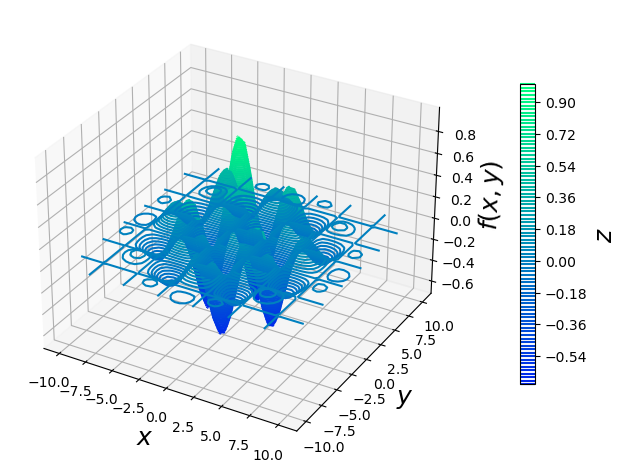

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np

# first generated the x,y values over which the function to be evaluated.
x = y = np.linspace(-10,10.150)

# now generate the $XY-$ grid using numpy.meshgrid
X,Y = np.meshgrid(x,y)

# now evaluate the function values on the above grid
Z = np.cos(X)*np.cos(Y)*np.exp(-(X/5)**2-(Y/5)**2)

# 3D Contour Plot

fig, ax = plt.subplots(figsize=(6,5))
ax.remove()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max()) #for normalising the colors in the plotting
p = ax.contour3D(X,Y,Z, 100, norm=norm, cmap=mpl.cm.winter)

ax.axis('tight')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_zlabel('$f(x,y)$',fontsize=18)
cb = fig.colorbar(p,ax=ax, shrink=0.6, pad=0.1)
cb.set_label('$z$', fontsize=18)

plt.show()

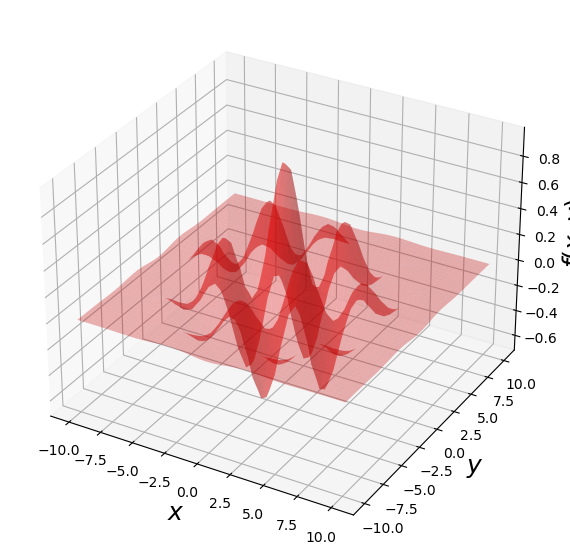

In [29]:
# 3D Wireframe Plot
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection':'3d'})

#norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max()) #for normalising the colors in the plotting
p = ax.plot_surface(X,Y,Z, color='red', alpha=0.3)
ax.axis('tight')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_zlabel('$f(x,y)$',fontsize=18)
plt.show()

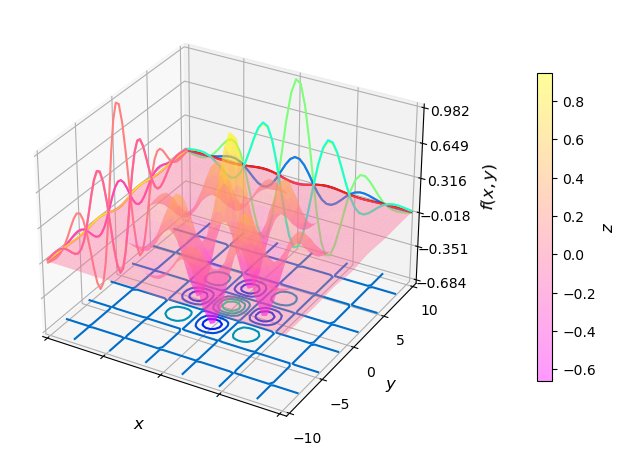

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

# 3D Surface Plot 
%matplotlib inline

# first generated the x,y values over which the function to be evaluated.
x = y = np.linspace(-10,10.150)

# now generate the $XY-$ grid using numpy.meshgrid
X,Y = np.meshgrid(x,y)

# now evaluate the function values on the above grid
Z = np.cos(X)*np.cos(Y)*np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(1,1,figsize=(8,8),subplot_kw={'projection':'3d'})

p = ax.plot_surface(X,Y,Z, cmap = mpl.cm.spring, alpha=0.4)
ax.axis('tight')
ax.set_xlabel('$x$',fontsize=12)
ax.set_ylabel('$y$',fontsize=12)
ax.set_zlabel('$f(x,y)$',fontsize=12,labelpad=10)
cb = fig.colorbar(p,ax=ax, shrink=0.5, pad=0.15)
cb.set_label('$z$', fontsize=12)

ax.set_xlim([X.min(), X.max()])
ax.set_ylim([Y.min(), Y.max()])
ax.set_zlim([Z.min(), Z.max()])
ax.set_xticks(np.linspace(-10,10,5))
ax.set_xticklabels([])
ax.set_yticks(np.linspace(-10,10,5))
ax.set_zticks(np.linspace(Z.min(),Z.max(),6))

cset1 = ax.contour(X,Y,Z, zdir='z', offset=Z.min(), cmap=mpl.cm.winter)
cset2 = ax.contour(X,Y,Z, zdir='y', offset=Y.max(), cmap=mpl.cm.jet)
cset3 = ax.contour(X,Y,Z, zdir='x', offset=X.min(), cmap=mpl.cm.spring)

plt.show()